In [26]:
from data import *
from model import *
from plot import *
from train import *
import time
from matplotlib import pylab
import datafold.pcfold as pfold
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Swiss Roll

d:\study-TUM\23ss\praktikum\Final project\sum_dmap_test\plot.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


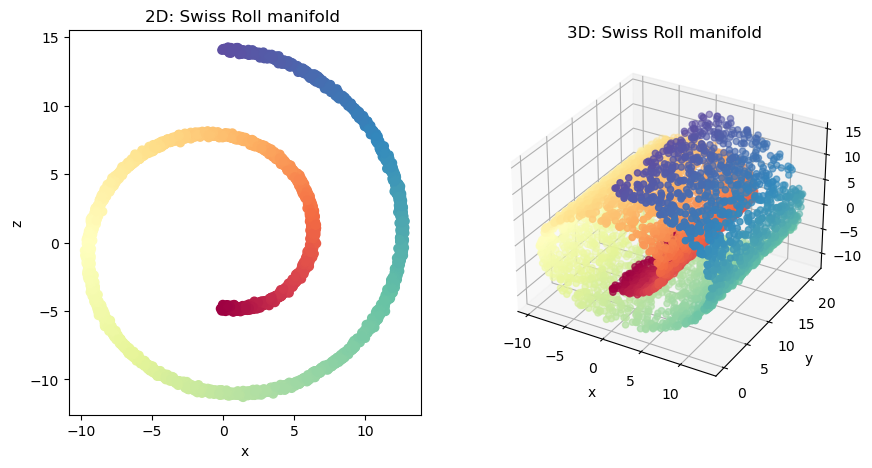

In [11]:
#n=50000 crashed
#n=40000 crashed
#n=30000 crashed
#n=20000 crashed
nr_samples=5000
data, timesteps = get_swiss_roll(nr_samples)
plot_swiss_roll(nr_samples,data, timesteps)

In [17]:
L=10
dmap = DiffusionMap()
start = time.time()
evecs, evals = dmap.diffusion_map_datafold(data,L,isSwissRoll=True)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 3.1229097843170166


Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99954521 0.99819117 0.9960086  0.99275804 0.99230344
 0.99167624 0.99048642 0.98869467 0.98839553 0.98512613]


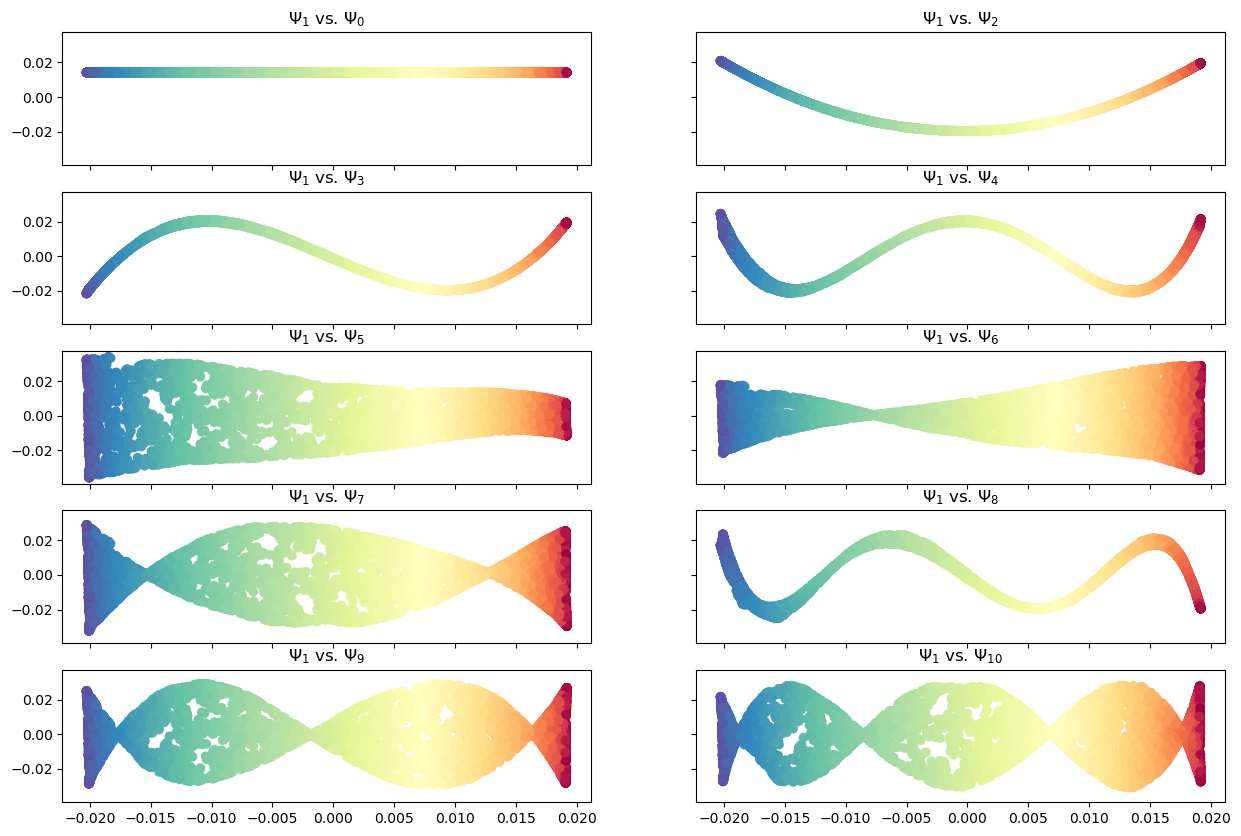

In [20]:
plot_diffusion_maps_swissRoll(nr_samples, L, evecs, evals ,time=timesteps)

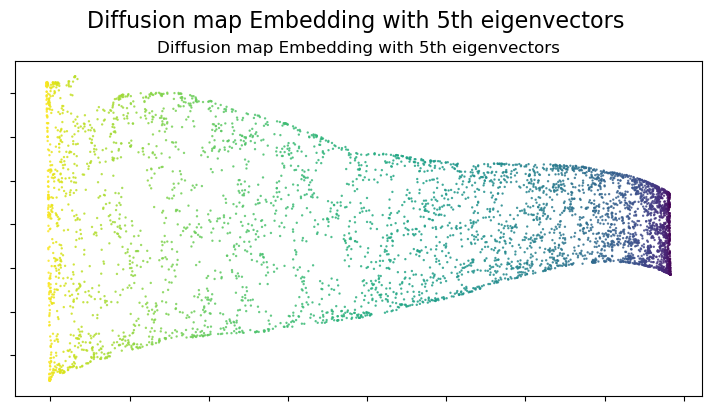

In [21]:
phi_l_plot = np.concatenate((evecs[:, 1].reshape(-1, 1), evecs[:, 5].reshape(-1, 1)), axis=1)
plot_dmap_2d(phi_l_plot, timesteps, "Diffusion map Embedding with 5th eigenvectors")

## Word2vec

In [16]:
gensim_model  = gensim.downloader.load("word2vec-google-news-300")

In [22]:
#10000 crashed
num_data_sample=5000

index = np.random.randint(0, len(gensim_model.index_to_key), (num_data_sample))
words = [gensim_model.index_to_key[i] for i in index]
embeddings = [gensim_model[word] for word in words]

In [23]:
data_word=np.array(embeddings)
X = data_word

In [24]:
L_cifar=2
dmap=DiffusionMap()
start = time.time()
Word_dmap,val=dmap.diffusion_map_datafold(X,L_cifar,isSwissRoll=False)
end = time.time()
print(f"The run time is : {end - start}")

The run time is : 208.83165884017944


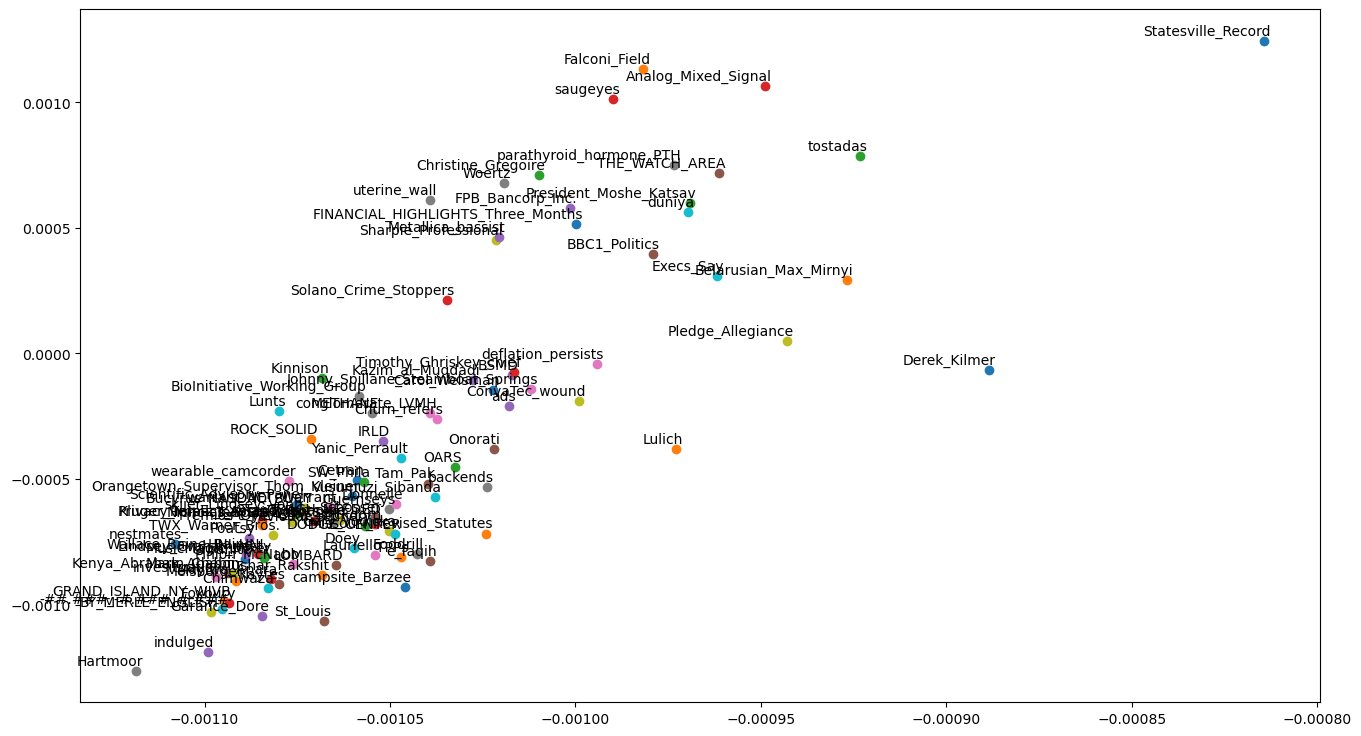

In [25]:
plot_word_embedding_damp(Word_dmap[:,1:3], words)

China Beijing
Russia Moscow
Japan Tokyo
Turkey Ankara
Poland Warsaw
Germany Berlin
France Paris
Italy Athens
Greece Rome
Spain Madrid
Portugal Lisbon


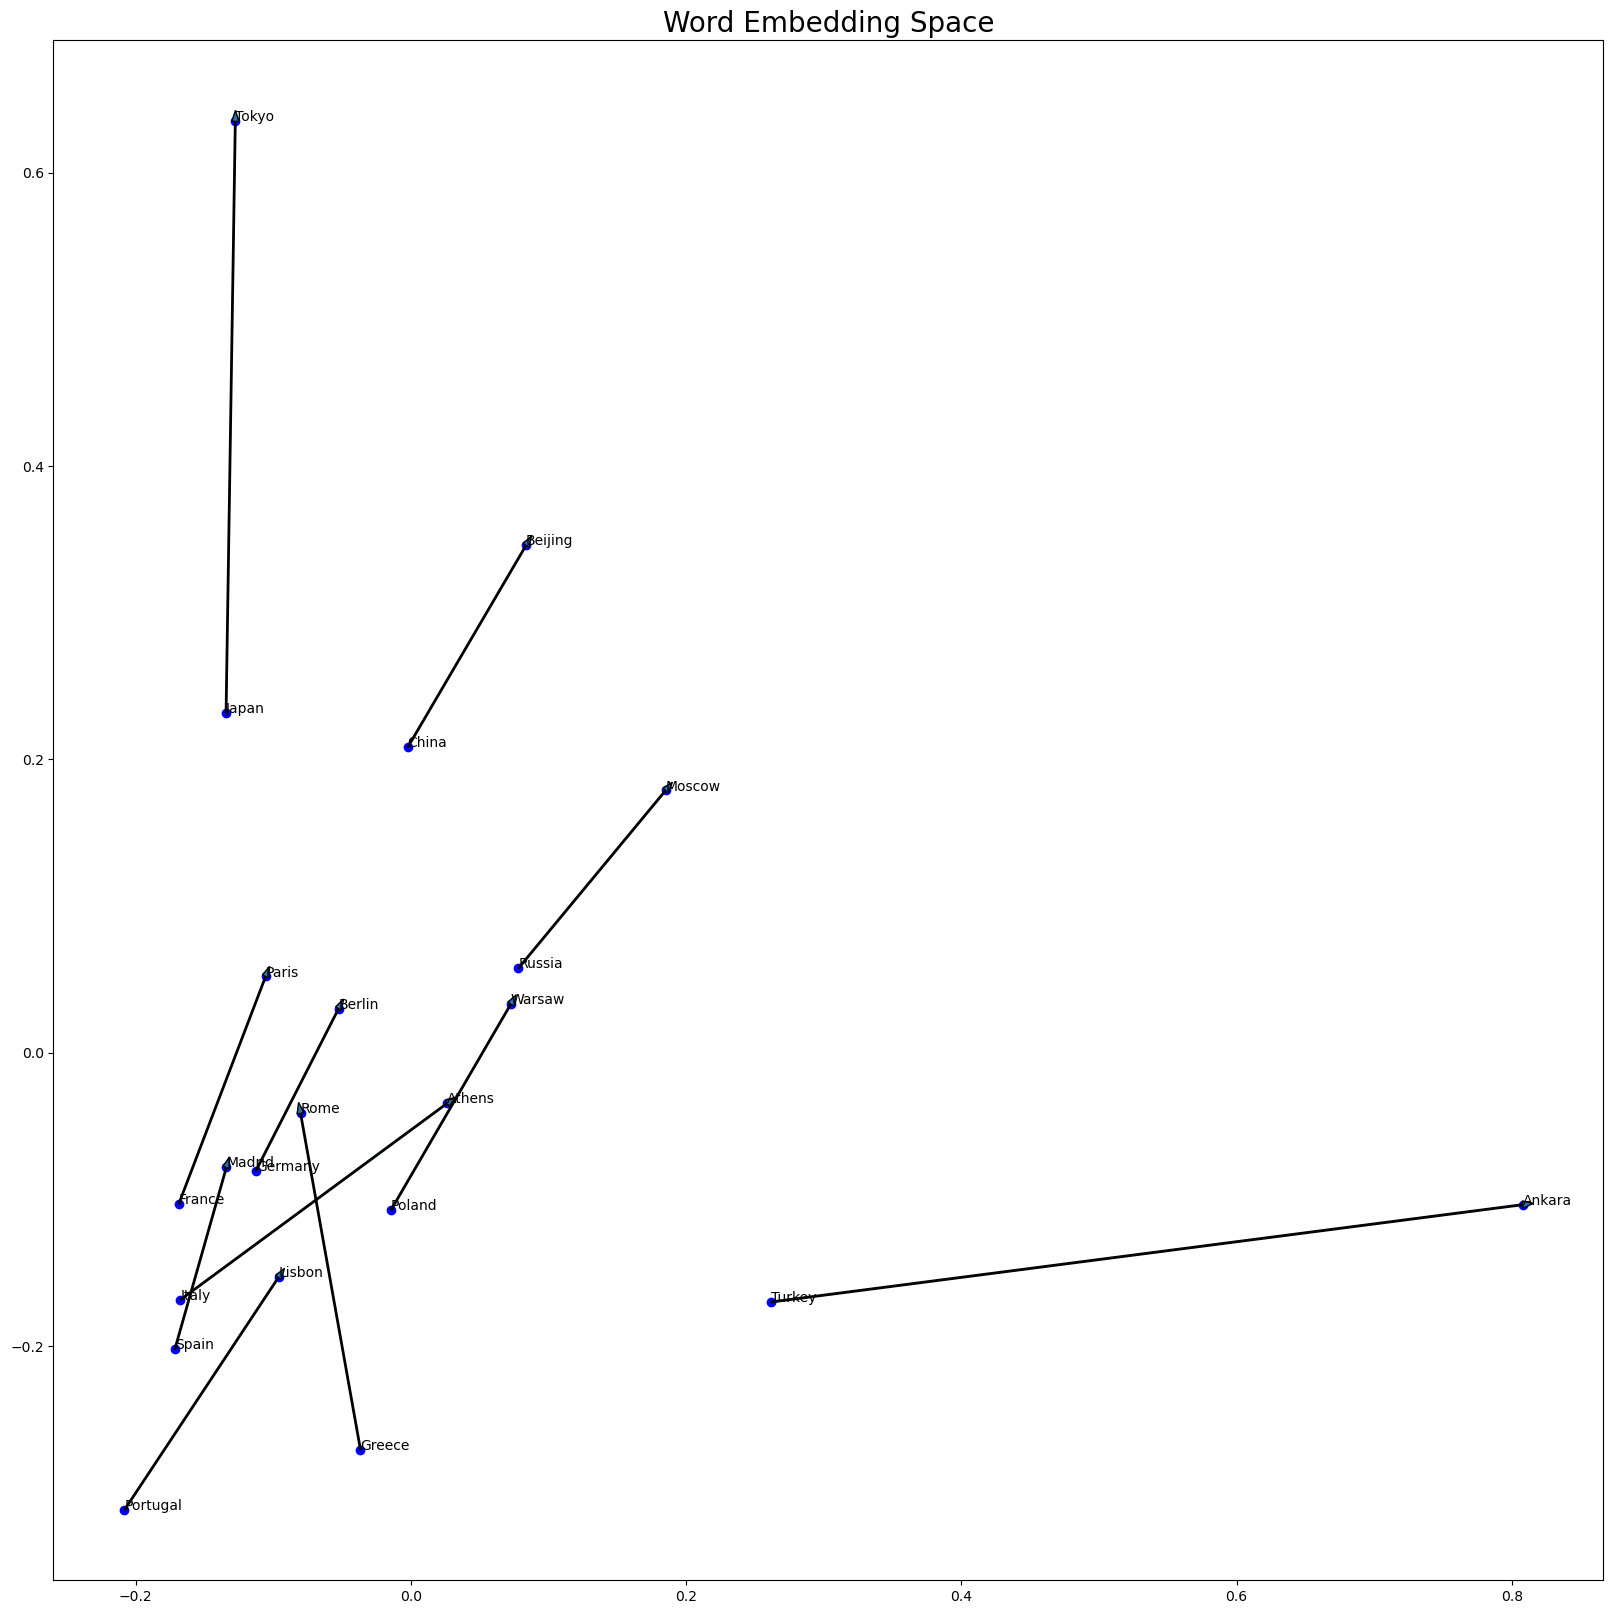

In [28]:
countries = ['China', 'Russia', 'Japan', 'Turkey', 'Poland', 'Germany', 'France', 'Italy', 'Greece', 'Spain', 'Portugal']
capitals = ['Beijing', 'Moscow', 'Tokyo', 'Ankara', 'Warsaw', 'Berlin', 'Paris', 'Athens', 'Rome', 'Madrid', 'Lisbon']
embeddings = [gensim_model[word] for word in countries + capitals]
embeddings = np.array(embeddings)
L_cifar=2
dim_red_em,val = dmap.diffusion_map_datafold(embeddings,L_cifar,isSwissRoll=False)

dim_red_em = dim_red_em[:,1:]
word_embedding_plot(dim_red_em, countries + capitals)

for i in range(len(countries)):
    country = dim_red_em[i]
    capital = dim_red_em[i+len(countries)]
    print(countries[i], capitals[i])
    plt.arrow(country[0], country[1], capital[0]-country[0], capital[1]-country[1], head_width = 0.005)

## Cifar 10

In [2]:
train_loader, val_loader, test_loader = cifar10(train_val_split = [45000, 5000], batch_size=32)


Files already downloaded and verified
Files already downloaded and verified


images.shape: torch.Size([32, 3, 32, 32])


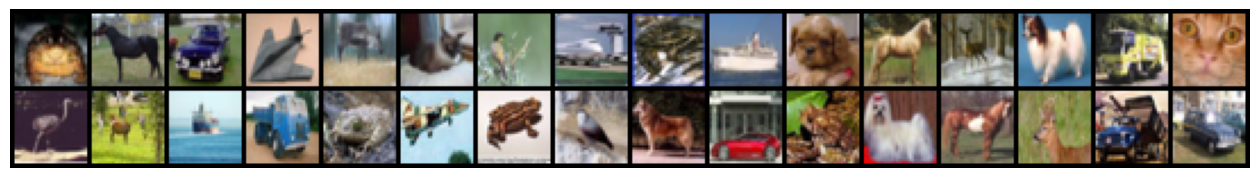

In [3]:
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [6]:
num_sample=5024
train_images ,train_labels=cifar10_dmap(train_loader,num_sample)


Train labels shape: (5024,)
Train images shape: (5024, 3072)


In [33]:
L_cifar=6
dmap_caifar = DiffusionMap()

start = time.time()
phi_l_cifar, lambda_l_cifar  = dmap_caifar.diffusion_map_datafold(train_images,L_cifar,isSwissRoll=False)
end = time.time()

print(f"The run time is : {end - start}")


The run time is : 245.40614819526672


In [34]:
phi_l_cifar.shape

(5024, 6)

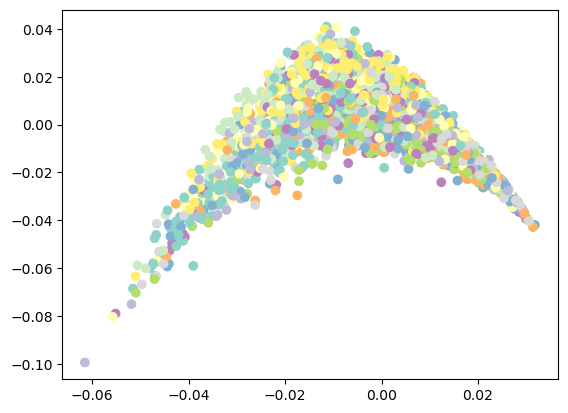

In [35]:
plt.scatter(phi_l_cifar[:, 1], phi_l_cifar[:, 2], c=train_labels, cmap='Set3')

Print 6 largest eigenvalues for the corresponding dataset: 
 [1.         0.52294244 0.28476168 0.20889137 0.15083544 0.11862446]


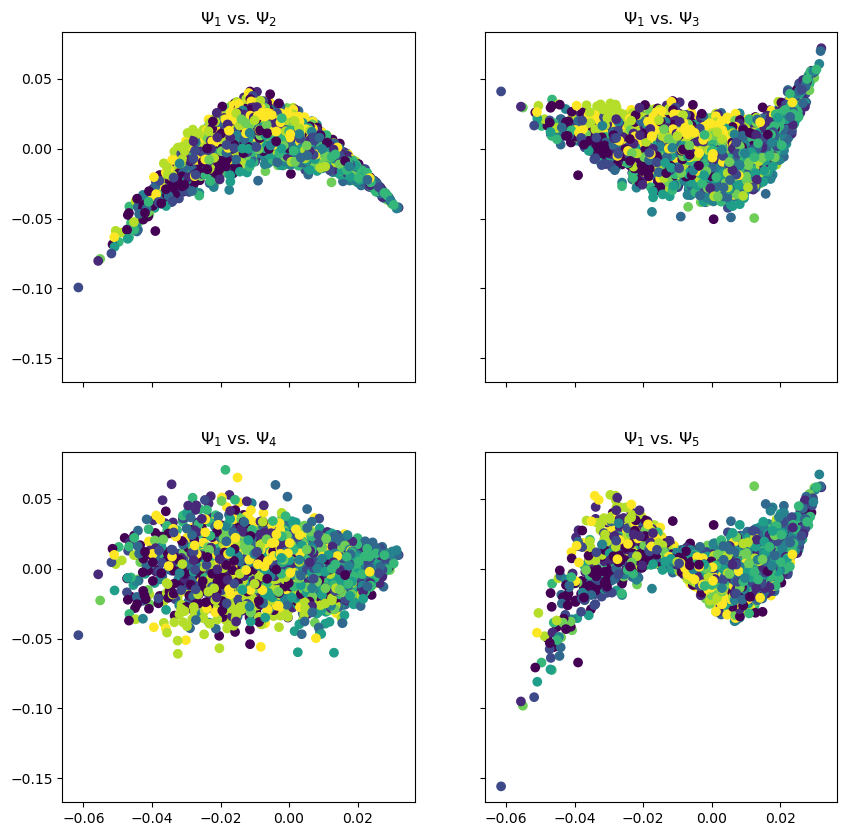

In [36]:
plot_diffusion_maps_cifar( L_cifar, phi_l_cifar, lambda_l_cifar,train_labels)